# Neural Networks III: Implementation Details 
Agenda today:
- Test your understanding!
- Backprop reviews
- Implementation details:
    - Batch 
    - Epoch
- Random Initialization 
- Use Keras to implement neural nets
- Fine Tuning your neural nets

## Part I. Test your understanding!
- What does a neuron compute?
    - A) A neuron computes an activation function followed by a linear function (z = Wx + b)
    - B) A neuron computes a linear function (z = Wx + b) followed by an activation function
    - C) A neuron computes a function g that scales the input x linearly (Wx + b)
    - D) A neuron computes the mean of all features before applying the output to an activation function
    
- The neural net learns the optimal parameters w and b by propagating ___ backwards.
    - A) Cost function
    - B) Error term 
    - C) Gradient 
    
- If you are working on a three class classification project, determining whether an image is of a cat, dog, or a person, which activation function is most appropriate?
    - A) ReLu
    - B) Linear 
    - C) Sigmoid
    - D) Leaky ReLu
    - E) Softmax
    - F) All of the above
    - G) None of the above
    
- Is the following statement true or false?

`During forward propagation, in the forward function for a layer l you need to know what is the activation function in a layer (Sigmoid, tanh, ReLU, etc.). During backpropagation, the corresponding backward function also needs to know what is the activation function for layer l, since the gradient depends on it. True/False?`

    - True
    - False

## Part II. Review of past lectures 

#### Forward Propagation 
The goal of neural networks is to find the optimal weight and biases that minimize an objective function, such that the prediction is as close to the output as possible. You would have to be at the step of having output a prediction to continue towards backprop. 

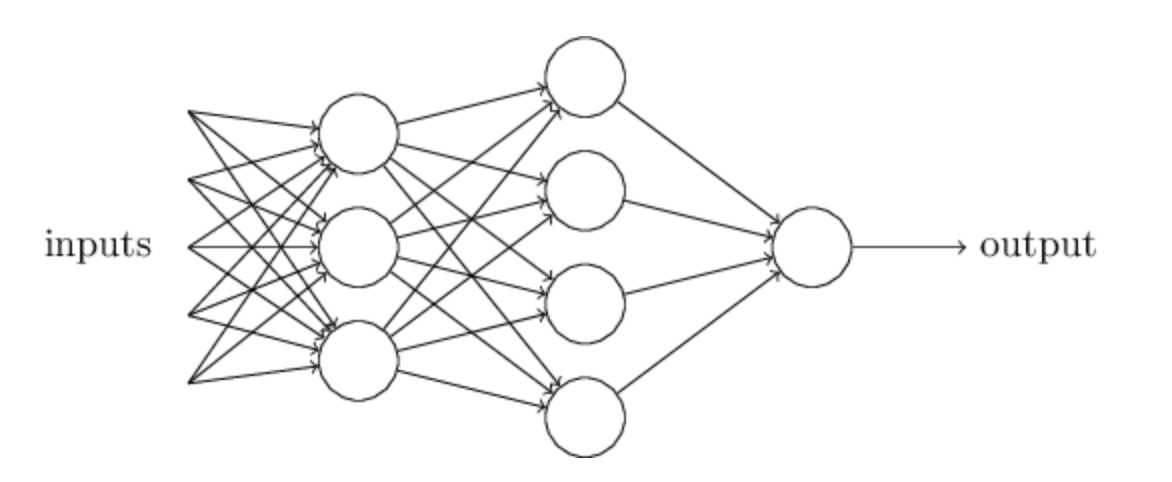

#### Backpropagation 
Backpropagation allows gradient descent to find the weight and biases by propagate the error term backwards into the hidden layers one layer at a time. 
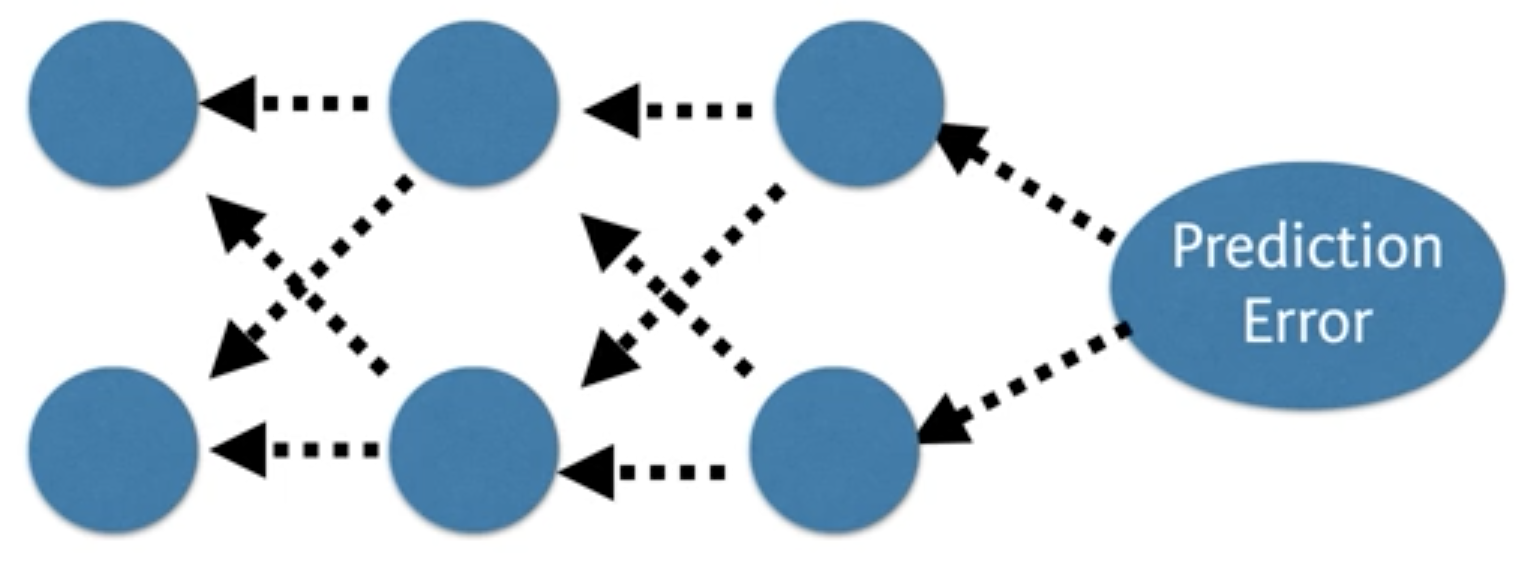

As we discussed last time, at the heart of backprop we use chain rule to find the value of the gradient of the weights, which are a product of:
- Node value feeding into the weight
- Gradient of cost function with regards to node it feeds into
- Gradient of the activation function at the node it feeds into 

For implementation, we usually want to keep track of the values of gradients of the cost function in regards to the node values 

## Part III. Implementation Details

### Gradient Descent 
Neural Nets are usually implemented at scale with large sets of data, therefore optimizing for speed becomes a big concern. Gradient descent can take a very **very** long time to run if we use a single training example every time to update the weights and biases. Therefore, we usually use batch-mode:

- Batch 
In the batch gradient descent, we pass all of the training example through the forward propagation stage before using backpropagation to compute the weights and biases

- Epoch
An epoch is when you finished passing all training examples through the forward propagation


##### Types of Gradient Descent & Their advantages and disadvantages
- Stochastic Gradient Descent 

SDG calculates the error and update the weight after training each observation in the training set. 

- Batch Gradient Descent

Batch calculates the error after each example is trained, but only update the weight after all of the observations have been trained

- Mini-Batch Gradient Descent

Mini-batch is a compromise between batch and SGD - it splits the training examples into mini batches, and calculates the error and update the weight after each iteration of the mini batches are done training. 


### Random Initialization 
When we feed the node values forward through layers, we intialize the weights with random values and biases to be zero. We do not initialize the weights to be 0 because it would cause the training to be pointless because all weights would end up being the same. You also do not want a very large initial weights because that would saturate the value of activation function, causing taking the gradient of the activation function to be hard (only when you use sigmoid and tanh though).

## Part IV. Using Keras 
Keras is the default choice for beginner deep learners due to its user-friendly structure and easy implementation. It is built upon Tensorflow. The four steps to building your neural net models are:
1. Specifying the architecture 
    - how many layers?
    - how many nodes in hidden layers?
    - what activation functions should you use?
2. Compile your model 
    - specify the cost function and details about how optimization works
        - learning rate
        - optimizer
        - list of metrics to use
3. Fit your model 
    - backpropagation and adjusting for model weights
4. Make predictions

See Sequential model guide [here](https://keras.io/getting-started/sequential-model-guide/)

In [1]:
import time

Using TensorFlow backend.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


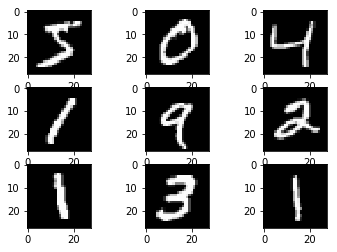

In [2]:
from keras.datasets import mnist
from matplotlib import pyplot
%matplotlib inline

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
                  # show the figur
pyplot.show()

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD

batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# specifying the model structure
model = Sequential()

# specify the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# specify the second layer
model.add(Dense(50, activation='relu'))

# specify the output layer
model.add(Dense(num_classes, activation='linear'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/2


You can save and re-use your model by using the following code:

In [ ]:
from keras.models import load_model
#model.save('file_name_0f_your_model.h5')
#my_model = load_model('file_name_0f_your_model.h5')

#make predictions using your model 
#my_prediction = my_model.predict(x_test)

## Part V. Tuning and Regularizing your Neural Networks 
As you have seen above, the neural nets performed terribly! How could that be? Optimization for NN is hard because:
- simultanouesly optimizing 1000+ parameters
- updates may not improve model meaningfully 
- updates too small or too large according to set learning rate

<img src="https://media.giphy.com/media/st83jeYy9L6Bq/giphy.gif">

In [ ]:
'''
# update the learning rate
# Loop over learning rates
import numpy as np
lr_to_test = list(np.arange(0,0.5,0.1))
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD()
    
    # Compile the model
    model.compile(optimizer=my_optimizer,loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)
    
'''

In [ ]:
# earlystopping - stop training if our models aren't improving
# patience - how many epoches models can keep running until we stop the training
from keras.callbacks import EarlyStopping
n = 2
stopping_monitor = EarlyStopping(patience = n)

### dropout regularization 
Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

As a neural network learns, neuron weights settle into their context within the network. Weights of neurons are tuned for specific features providing some specialization. Neighboring neurons become to rely on this specialization, which if taken too far can result in a fragile model too specialized to the training data. This reliant on context for a neuron during training is referred to complex co-adaptations.
<img src = 'dropout-peace.png' width = 450>

####  Optimizers

- RMSProp
(RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on non-stationary problems (e.g. noisy).

- Adagrad
(AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

- Adam
Adam realizes the benefits of both AdaGrad and RMSProp.

Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).

In [ ]:
# model capacity - overfitting and underfitting 
# building deep learning model is an iterative process, and we cannot use architecture we learned before such as
# grid search - why?

# specifying the model structure
model = Sequential()

# specify the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

# specify the second layer
model.add(Dense(50))
model.add(Dropout(0.2))

# specify the output layer
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



In [ ]:
tic = time.time()
model = Sequential()
# specify the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

# specify the second layer
model.add(Dense(50))
model.add(Dropout(0.2))

# specify the output layer
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
toc = time.time()

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('run time:',toc-tic)


In [ ]:
tic = time.time()
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
toc = time.time()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('run time:', toc-tic)

#### Comparison of Optimizers  in performance of the MNIST dataset
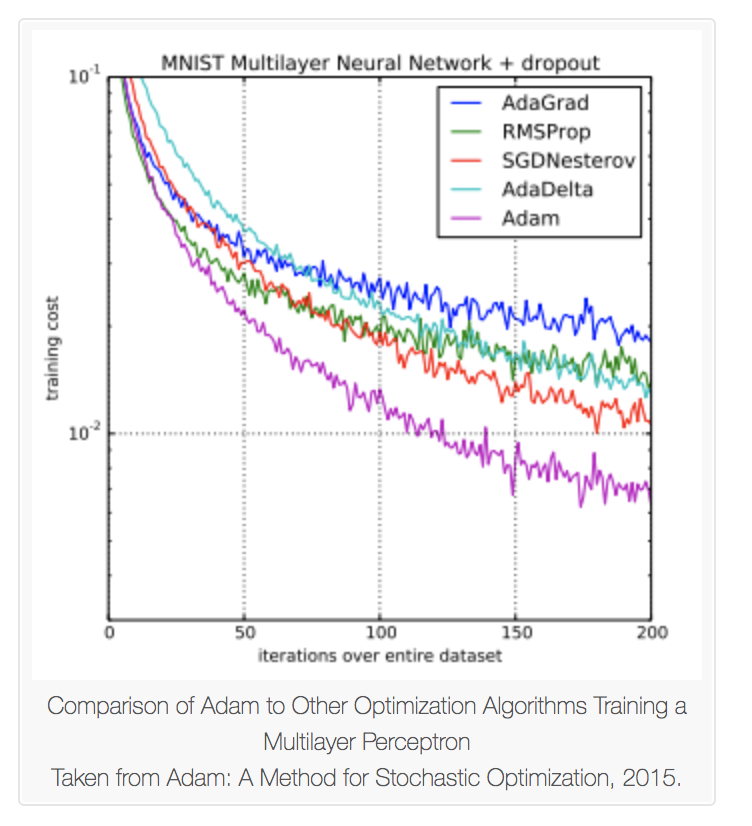

Citation & resources:
- [idea of dropout](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)
- Deep Learning in Python using Keras on [Datacamp](https://campus.datacamp.com/courses/deep-learning-in-python)